In [1]:
import matplotlib as mpl
import numpy as np
import pandas as pd

mpl.rcParams['axes.unicode_minus'] = False
from matplotlib import pyplot as plt

plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['font.size'] = 10.0
import warnings

warnings.filterwarnings('ignore')
# pd.options.display.float_format = '{:,.1f}'.format    # 데이터 숫자 출력 서식

In [2]:
# pip install plotnine # 시각화 라이브러리 → R에서 시각화하는 방법과 유사하게 시각화 한다.
from plotnine import *
import missingno as msno

In [3]:
# 현재 소스프로그램의 경로를 보여준다.
%pwd

'/Users/kyle/Documents/Study/Data-Analysis/KDT_Data/analysis/workspace'

In [4]:
# 현재 소스프로그램이 위치한 경로의 파일 목록을 보여준다.
# %ls
%ls data

Seattle2014.csv
a_new_hope.txt
alice.txt
alice_color.png
alice_mask.png
concat_1.csv
concat_2.csv
concat_3.csv
constitution.txt
country_timeseries.csv
gapminder.tsv
interpolation.png
korea_mask.jpg
perSale_202112.csv
pew.csv
scientists.csv
stormtrooper_mask.png
survey_person.csv
survey_site.csv
survey_survey.csv
survey_visited.csv
tips.csv
wordData.txt
전국_신규_민간아파트_분양가격_202112 복사본.csv
전국_신규_민간아파트_분양가격_202112.csv


# 전국 신규 민간 아파트 분양 가격 동향
2015년 10월부터 2021년 12월까지 주택분양보증을 받아 분양한 전체 민간 신규 아파트 분양 가격 동향
https://www.data.go.kr/data/

In [5]:
# 한글 인코딩 오류 발생시(UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc1 in position 0: invalid start byte)
# encoding='EUC-KR(CP949, MS949 또는 EUC-KR)', engine='python'
# pre_sale = pd.read_csv('./data/전국_신규_민간아파트_분양가격_202112.csv', sep=',', encoding='EUC-KR', engine='python')
# pre_sale = pd.read_csv('./data/perSale_202112.csv', sep=',', encoding='MS949')
# pre_sale = pd.read_csv('./data/perSale_202112.csv', sep=',', encoding='CP949')
pre_sale = pd.read_csv('./data/perSale_202112.csv', sep=',')
pre_sale.shape

(6375, 5)

In [6]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [7]:
pre_sale.dtypes

지역명           object
규모구분          object
연도             int64
월              int64
분양가격(제곱미터)    object
dtype: object

In [8]:
pre_sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6375 entries, 0 to 6374
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6375 non-null   object
 1   규모구분        6375 non-null   object
 2   연도          6375 non-null   int64 
 3   월           6375 non-null   int64 
 4   분양가격(제곱미터)  5891 non-null   object
dtypes: int64(2), object(3)
memory usage: 249.1+ KB


In [9]:
# 연도와 월은 연산에 사용되는 데이터가 아니라 구분에 사용되는 카테고리 형태의 데이터이므로 문자열로 변환한다.
pre_sale['연도'] = pre_sale['연도'].astype(str)
pre_sale['월'] = pre_sale['월'].astype(str)  # .get()은 값을 얻어올 때만 사용 가능, 변경시 불가
pre_sale.dtypes

지역명           object
규모구분          object
연도            object
월             object
분양가격(제곱미터)    object
dtype: object

In [10]:
# 분양가격(제곱미터)는 연산에 사용되는 데이터이므로 숫자로 변경한다.
# astype() 메서드로 문자열을 숫자로 변경하는 경우 숫자가 아닌 문자열이 있으면 에러가 발생한다. 이 때, no_numeric()으로 어느 정도 제어 가능하다.
# to_numeric() 메서드의 errors 속성의 기본값은 raise로, 숫자로 변경할 수 없는 값이 있으면 오류를 발생시킨다.
# errors='ignore'
# errors='coerce'
pre_sale['분양가격(제곱미터)'] = pd.to_numeric(pre_sale['분양가격(제곱미터)'], errors='coerce')
# 2021년 9월 데이터부터 '분양가격(제곱미터)' 열에 "6,493" 형태로 입력되어 누락값으로 처리되는 문제가 발생되었다.
# csv 파일을 엑셀로 열어서 데이터 서식을 변경한 후 다시 저장하여 사용한다. → 셀 서식을 숫자로 변경
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
dtype: object

In [11]:
pre_sale

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841.0
1,서울,전용면적 60제곱미터이하,2015,10,5652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0
4,서울,전용면적 102제곱미터초과,2015,10,5879.0
...,...,...,...,...,...
6370,제주,모든면적,2021,12,6574.0
6371,제주,전용면적 60제곱미터이하,2021,12,2862.0
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,6516.0
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,5924.0


In [12]:
# 숫자로 변경된 '분양가격(제곱미터)'를 이용해서 평당 분양 가격을 계산한 열을 추가한다
pre_sale['분양가격(평)'] = pre_sale['분양가격(제곱미터)'] * 3.3
pre_sale.dtypes

지역명            object
규모구분           object
연도             object
월              object
분양가격(제곱미터)    float64
분양가격(평)       float64
dtype: object

In [13]:
pre_sale.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(평)
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [14]:
# isnull()과  sum()을 사용해서 누락값이 존재하는지 확인하기
pre_sale.isnull().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    515
분양가격(평)       515
dtype: int64

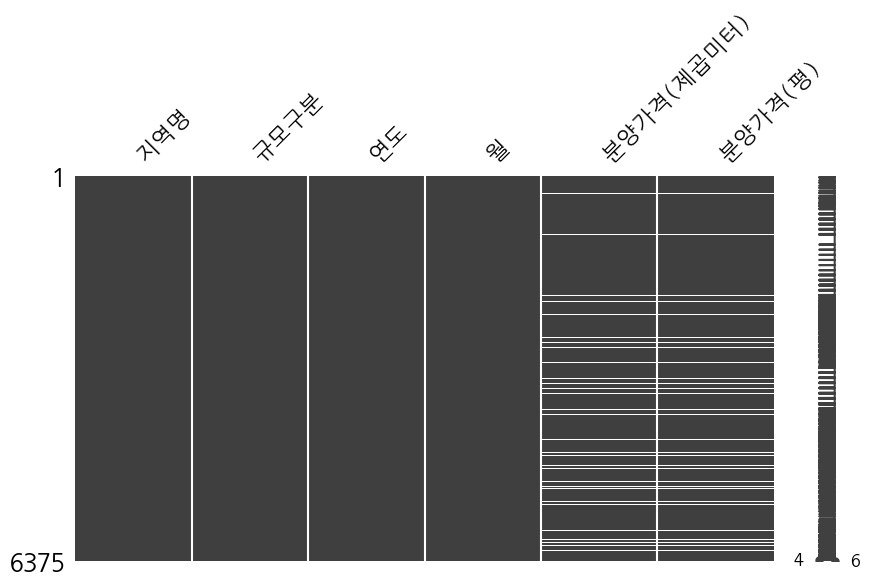

In [15]:
# missingno 라이브러리로 그래프를 그려서 누락값 확인하기 → 중간 중간에 다른 색으로 보이는 부분이 누락값을 의미
# missingno 라이브러리로 그래프 크기는 figsize 옵션에 지정한다.
msno.matrix(pre_sale, figsize=(10, 5))
plt.show()

In [16]:
# 2017년 데이터만 추출한다.
# pre_sale_2017 = pre_sale[pre_sale['연도'] == '2017']  # Boolean Indexing
pre_sale_2017 = pre_sale.loc[pre_sale['연도'] == '2017']
print(pre_sale_2017.isnull().sum())
pre_sale_2017

지역명            0
규모구분           0
연도             0
월              0
분양가격(제곱미터)    45
분양가격(평)       45
dtype: int64


,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(평)
1275,서울,모든면적,2017,1,6450.0,21285.0
1276,서울,전용면적 60제곱미터이하,2017,1,6662.0,21984.6
1277,서울,전용면적 60제곱미터초과 85제곱미터이하,2017,1,6500.0,21450.0
1278,서울,전용면적 85제곱미터초과 102제곱미터이하,2017,1,7030.0,23199.0
1279,서울,전용면적 102제곱미터초과,2017,1,6771.0,22344.3
...,...,...,...,...,...,...
2290,제주,모든면적,2017,12,3578.0,11807.4
2291,제주,전용면적 60제곱미터이하,2017,12,5380.0,17754.0
2292,제주,전용면적 60제곱미터초과 85제곱미터이하,2017,12,3467.0,11441.1
2293,제주,전용면적 85제곱미터초과 102제곱미터이하,2017,12,NaN,NaN


In [17]:
# 시도별 데이터가 동일하게 저장되어 있다.
pre_sale['지역명'].value_counts()

서울    375
강원    375
경남    375
경북    375
전남    375
전북    375
충남    375
충북    375
세종    375
인천    375
울산    375
대전    375
광주    375
대구    375
부산    375
경기    375
제주    375
Name: 지역명, dtype: int64

In [18]:
# 규모구분별 데이터가 동일하게 저장되어 있다.
pre_sale['규모구분'].value_counts()

모든면적                       1275
전용면적 60제곱미터이하              1275
전용면적 60제곱미터초과 85제곱미터이하     1275
전용면적 85제곱미터초과 102제곱미터이하    1275
전용면적 102제곱미터초과             1275
Name: 규모구분, dtype: int64

전국 연도별 평균 분양 가격

In [19]:
pre_sale.groupby(pre_sale['연도'])['분양가격(평)'].mean()

연도
2015     9202.735802
2016     9683.025000
2017    10372.928923
2018    10978.938411
2019    12188.293092
2020    13039.422449
2021    13636.022540
Name: 분양가격(평), dtype: float64

In [20]:
# pd.options.display.float_format을 사용해서 데이터프레임에 저장된 실수 데이터의 출력 서식을 지정할 수 있다.
# 천단위마다 ','를 출력하고 '.' 뒤의 숫자 만큼 소수점 아래 자리를 표시한다.
# 'f'를 붙이지 않으면 실수가 'e'를 사용하는 지수 형태로 표시된다.
pd.options.display.float_format = '{:,.1f}'.format

In [21]:
# describe() 메서드로 데이터프레임의 숫자 데이터가 저장된 열의 요약 통계를 확인할 수 있다.
pre_sale.groupby(pre_sale['연도']).describe()

분양가격(제곱미터)                                                           \
          count    mean     std     min     25%     50%     75%      max   
연도                                                                         
2015      243.0 2,788.7   976.9 1,868.0 2,225.0 2,516.0 3,025.5  7,092.0   
2016      984.0 2,934.2 1,071.4 1,900.0 2,282.0 2,672.0 3,148.5  8,096.0   
2017      975.0 3,143.3 1,110.5 1,976.0 2,373.0 2,838.0 3,466.0  7,887.0   
2018      919.0 3,327.0 1,186.1 2,076.0 2,525.0 2,952.0 3,698.0  8,098.0   
2019      912.0 3,693.4 1,563.2 2,124.0 2,635.5 3,395.0 4,066.2 12,728.0   
2020      882.0 3,951.3 1,632.7 2,297.0 2,780.5 3,734.5 4,441.0 13,835.0   
2021      945.0 4,132.1 1,567.7 2,409.0 3,057.0 3,858.0 4,539.0 10,746.0   

     분양가격(평)                                                               
       count     mean     std     min      25%      50%      75%      max  
연도                                                                         
2015   243.0  9,202.7 3,223.6 6,164.4  7,342.5  8,302.8  9,984.1 23,403.6  
2016   984.0  9,683.0 3,535.8 6,270.0  7,530.6  8,817.6 10,390.0 26,716.8  
2017   975.0 10,372.9 3,664.7 6,520.8  7,830.9  9,365.4 11,437.8 26,027.1  
2018   919.0 10,978.9 3,914.1 6,850.8  8,332.5  9,741.6 12,203.4 26,723.4  
2019   912.0 12,188.3 5,158.6 7,009.2  8,697.1 11,203.5 13,418.6 42,002.4  
2020   882.0 13,039.4 5,388.1 7,580.1  9,175.6 12,323.8 14,655.3 45,655.5  
2021   945.0 13,636.0 5,173.4 7,949.7 10,088.1 12,731.4 14,978.7 35,461.8

In [22]:
# describe() 메서드 실행 결과에 'T'를 실행하여 함수 실행 결과를 전치시켜서 요약 통계를 수직 방향으로 출력할 수 있다.
pre_sale.groupby(pre_sale.연도).describe().T

연도                   2015     2016     2017     2018     2019     2020  \
분양가격(제곱미터) count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   2,788.7  2,934.2  3,143.3  3,327.0  3,693.4  3,951.3   
           std      976.9  1,071.4  1,110.5  1,186.1  1,563.2  1,632.7   
           min    1,868.0  1,900.0  1,976.0  2,076.0  2,124.0  2,297.0   
           25%    2,225.0  2,282.0  2,373.0  2,525.0  2,635.5  2,780.5   
           50%    2,516.0  2,672.0  2,838.0  2,952.0  3,395.0  3,734.5   
           75%    3,025.5  3,148.5  3,466.0  3,698.0  4,066.2  4,441.0   
           max    7,092.0  8,096.0  7,887.0  8,098.0 12,728.0 13,835.0   
분양가격(평)    count    243.0    984.0    975.0    919.0    912.0    882.0   
           mean   9,202.7  9,683.0 10,372.9 10,978.9 12,188.3 13,039.4   
           std    3,223.6  3,535.8  3,664.7  3,914.1  5,158.6  5,388.1   
           min    6,164.4  6,270.0  6,520.8  6,850.8  7,009.2  7,580.1   
           25%    7,342.5  7,530.6  7,830.9  8,332.5  8,697.1  9,175.6   
           50%    8,302.8  8,817.6  9,365.4  9,741.6 11,203.5 12,323.8   
           75%    9,984.1 10,390.0 11,437.8 12,203.4 13,418.6 14,655.3   
           max   23,403.6 26,716.8 26,027.1 26,723.4 42,002.4 45,655.5   

연도                   2021  
분양가격(제곱미터) count    945.0  
           mean   4,132.1  
           std    1,567.7  
           min    2,409.0  
           25%    3,057.0  
           50%    3,858.0  
           75%    4,539.0  
           max   10,746.0  
분양가격(평)    count    945.0  
           mean  13,636.0  
           std    5,173.4  
           min    7,949.7  
           25%   10,088.1  
           50%   12,731.4  
           75%   14,978.7  
           max   35,461.8

# 전국 규모별 평균 평당 분양 가격
※ pivot_table() 메서드는 엑셀의 피벗 테이블과 유사한 형태로 데이터를 출력한다.
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;pivot_table(values, index, columns, aggfunc, fill_value)
- values: 피벗 테이블을 작성할 데이터프레임의 열을 지정한다. [필수]
- index: 그룹화의 첫 번째 기준으로 사용할 데이터프레임의 열을 지정한다. → 행 단위 그룹화 [필수]
- columns: 그룹화의 두 번째 기준으로 사용할 데이터프레임의 열을 지정한다. → 열 단위 그룹화
- aggfunc: 그룹화된 결과에 적용할 함수를 지정한다. mean이 기본값이며 count, sum, mean, max, min, std, median 등 사용가능
- fill_value: 피벗 테이블에 표시되는 NaN을 대체할 데이터를 지정한다. → 주로 0을 입력한다.

In [23]:
pre_sale.pivot_table(values='분양가격(평)', index='규모구분', columns='연도', aggfunc='sum', fill_value=0)

연도,2015,2016,2017,2018,2019,2020,2021
규모구분,,,,,,,
모든면적,"453,545.4","1,895,780.7","2,025,173.7","2,167,192.5","2,274,132.3","2,438,907.9","2,796,205.5"
전용면적 102제곱미터초과,"442,675.2","1,984,247.1","2,228,315.1","2,025,866.7","2,479,662.9","2,265,017.7","2,502,251.4"
전용면적 60제곱미터이하,"429,673.2","1,889,174.1","2,023,461.0","1,995,371.4","2,048,211.0","2,356,160.4","2,557,800.3"
전용면적 60제곱미터초과 85제곱미터이하,"453,482.7","1,896,381.3","2,007,449.4","2,162,074.2","2,288,731.5","2,403,858.6","2,783,460.9"
전용면적 85제곱미터초과 102제곱미터이하,"456,888.3","1,862,513.4","1,829,206.5","1,739,139.6","2,024,985.6","2,036,826.0","2,246,323.2"


In [24]:
pre_sale.groupby(pre_sale['규모구분'])['분양가격(평)'].sum()

규모구분
모든면적                      14,050,938.0
전용면적 102제곱미터초과            13,928,036.1
전용면적 60제곱미터이하             13,299,851.4
전용면적 60제곱미터초과 85제곱미터이하    13,995,438.6
전용면적 85제곱미터초과 102제곱미터이하   12,195,882.6
Name: 분양가격(평), dtype: float64

# 전국 지역별 평균 평당 분양 가격

In [25]:
# 규모구분이 모든면적으로 되어있는 분양가격(평)으로 연도별 변동 금액을 살펴보자.
region_year_all = pre_sale[pre_sale['규모구분'] == '모든면적']
region_year_all

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(평)
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
5,인천,모든면적,2015,10,"3,163.0","10,437.9"
10,경기,모든면적,2015,10,"3,138.0","10,355.4"
15,부산,모든면적,2015,10,"3,112.0","10,269.6"
20,대구,모든면적,2015,10,"2,682.0","8,850.6"
...,...,...,...,...,...,...
6350,전북,모든면적,2021,12,"2,777.0","9,164.1"
6355,전남,모든면적,2021,12,"2,892.0","9,543.6"
6360,경북,모든면적,2021,12,"3,297.0","10,880.1"
6365,경남,모든면적,2021,12,"3,309.0","10,919.7"


In [26]:
region_year = region_year_all.pivot_table(values='분양가격(평)', index='지역명', columns='연도')
region_year

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"
대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1"
대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1"
부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7"
서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2"


In [27]:
# pivot_table()의 실행 결과는 2번째 인수(index)가 피벗 테이블의 index로 사용되므로 기존 index를 데이터로 사용하고 index를 다시 지정하려면 pivot_table()의 실행 결과에 reset_index()를 실행하면 된다.
region_year = region_year.reset_index()
region_year.head()

연도,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [28]:
print(region_year.columns)
print(region_year.columns.name)
# 데이터프레임의 columns 속성에 리스트 형태로 컬럼 이름을 넘겨서 전체 컬럼 이름을 일괄적으로 변경할 수 있다.
region_year.columns = ['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년']
print(region_year.columns)
region_year.columns.name = '일련번호'  # 인덱스의 열 이름을 변경한다.
region_year

Index(['지역명', '2015', '2016', '2017', '2018', '2019', '2020', '2021'], dtype='object', name='연도')
연도
Index(['지역', '2015년', '2016년', '2017년', '2018년', '2019년', '2020년', '2021년'], dtype='object')


일련번호,지역,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"
5,대구,"9,232.3","10,310.0","11,507.1","12,075.8","13,852.0","15,145.1","15,558.1"
6,대전,"8,098.2","8,501.6","9,056.0","10,180.2","11,777.7","11,094.0","11,914.1"
7,부산,"10,307.0","10,429.9","11,663.6","12,997.9","13,116.4","13,247.6","14,645.7"
8,서울,"19,725.2","20,663.5","21,425.2","22,889.3","26,131.0","26,910.1","30,115.2"
9,세종,"8,750.5","8,860.5","9,133.0","10,354.9","11,078.9","11,355.3","12,561.2"


In [29]:
# rename() 메서드로 특정 컬럼 이름을 선택해서 변경할 수 있다. 열 이름이 변경된 데이터프레임을
region_year = region_year.rename(columns={'지역': '지역이름'})
region_year.head()

일련번호,지역이름,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [30]:
# inplace=True 옵션을 지정하면 메서드가 실행된 결과를 다시 저장하지 않아도 데이터프레임에 반영한다.
region_year.rename(columns={'지역이름': '지역명'}, inplace=True)
region_year.head()

일련번호,지역명,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [31]:
# 특정 컬럼 이름에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.columns[0])
for i in range(1, 8):
    region_year.rename(columns={region_year.columns[i]: str(i + 2014)}, inplace=True)
region_year.head()

지역명


일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [32]:
print(list(region_year.index))
region_year.index = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15',
                     '16']
print(list(region_year.index))
region_year.head()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16']


일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
00,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
01,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
03,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [33]:
# rename() 메서드로 특정 인덱스 이름을 선택해서 변경할 수 있다.
region_year.rename(index={'00': '영번째', '01': '첫번째'}, inplace=True)
region_year.head()

일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
영번째,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
첫번째,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
02,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
03,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
04,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


In [34]:
# 특정 인덱스 이름에 접근할 때 인덱싱을 사용할 수 있다.
print(region_year.index[0])
for i in range(17):
    region_year.rename(index={region_year.index[i]: i}, inplace=True)
region_year.head()

영번째


일련번호,지역명,2015,2016,2017,2018,2019,2020,2021
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9"


# 전국 지역별 평균 분양 가격 변동 금액

In [35]:
region_year['변동액'] = region_year['2021'] - region_year['2015']
region_year.head()

일련번호,지역명,2015,2016,2017,2018,2019,2020,2021,변동액
0,강원,"7,159.9","7,011.1","7,170.6","7,680.8","8,141.6","9,331.3","9,716.9","2,557.0"
1,경기,"10,377.4","11,220.0","11,840.7","13,186.0","14,468.8","14,383.3","14,183.1","3,805.7"
2,경남,"7,585.6","7,847.9","8,163.9","9,019.4","9,870.9","10,160.7","10,505.0","2,919.4"
3,경북,"7,170.9","7,360.6","7,802.6","8,505.2","8,856.6","9,545.0","10,333.4","3,162.5"
4,광주,"8,052.0","8,898.7","9,471.0","9,855.7","11,822.8","12,500.1","14,020.9","5,968.9"


In [36]:
max_delta_price = np.max(region_year['변동액']) * 1000
# sido = region_year[region_year['변동액'] == np.max(region_year['변동액'])].values[0][0]
sido = region_year[region_year['변동액'] == np.max(region_year['변동액'])].지역명.values[0]
print('2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 {}(으)로 상승액은 평당 {:,.0f}원이다.'.format(sido, max_delta_price))
max_delta_price

2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 큰 지역은 제주(으)로 상승액은 평당 16,018,750원이다.


16018749.999999996

In [37]:
min_delta_price = np.min(region_year['변동액']) * 1000
sido = region_year[region_year['변동액'] == np.min(region_year['변동액'])].지역명.values[0]
print('2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역은 {}(으)로 상승액은 평당 {:,.0f}원이다.'.format(sido, min_delta_price))
min_delta_price

2015년부터 2021년까지 분양가는 계속 상승했으며, 상승액이 가장 작은 지역은 충북(으)로 상승액은 평당 2,036,100원이다.


2036099.9999999995

# Plotnine 라이브러리를 이용한 시각화

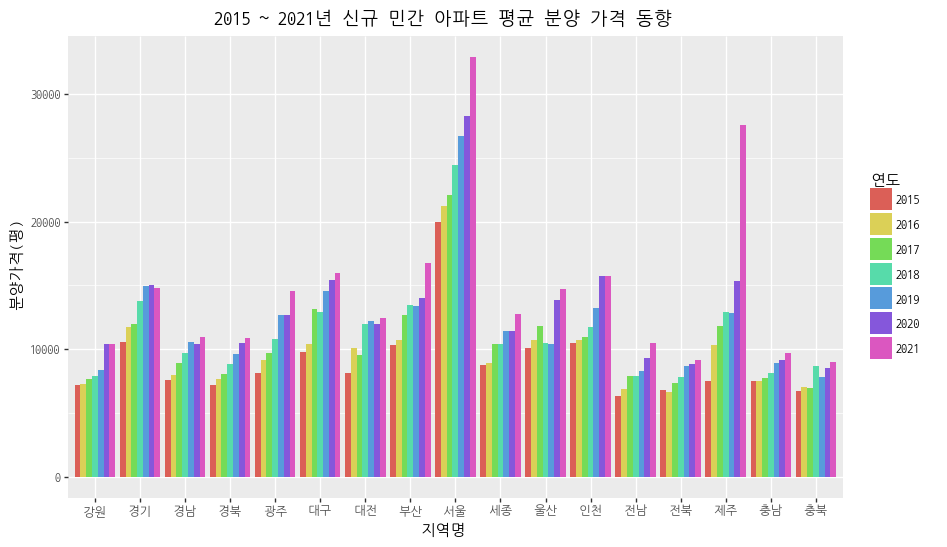

<ggplot: (369170405)>

In [38]:
# 연도별/지역별 평당 분양가 평균 시각화
# ggplot(데이터프레임, aes(x=‘x축’, y=‘y축’, fill=‘범례’))    # 제1 레이어(차트 배경)를 만든다.
#   + 차트함수()    # 배경 위에 차트를 만든다.
#   + 차트속성함수()  # 차트 위에 각종 필요한 정보를 표시한다.
'''
ggplot(region_year_all, aes(x='지역명', y='분양가격(평)', fill='연도')) \
    + geom_bar(stat='identity', position='dodge') \
    + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6)) + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양 가격 동향')
'''
(ggplot(region_year_all, aes(x='지역명', y='분양가격(평)', fill='연도'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6)) + ggtitle(
            '2015 ~ 2021년 신규 민간 아파트 평균 분양 가격 동향')
 )

In [39]:
# 규모별/지역별 평당 분양가 합계 피벗 테이블
pre_sale_sum = pre_sale.pivot_table(values='분양가격(평)', index='규모구분', columns='지역명', aggfunc='sum').reset_index()
pre_sale_sum

지역명,규모구분,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
0,모든면적,"610,107.3","982,515.6","689,571.3","650,354.1","822,987.0","969,074.7","774,579.3","944,133.3","1,836,789.9","718,245.0","759,069.3","929,728.8","595,316.7","577,757.4","1,006,575.9","616,638.0","567,494.4"
1,전용면적 102제곱미터초과,"730,237.2","1,143,073.8","710,744.1","711,532.8","779,773.5","1,059,481.5","446,252.4","1,008,889.2","1,737,400.5","728,583.9","437,860.5","1,083,960.9","687,875.1","640,635.6","775,120.5","609,985.2","636,629.4"
2,전용면적 60제곱미터이하,"626,538.0","1,014,324.3","662,630.1","643,318.5","725,201.4","970,262.7","689,502.0","910,199.4","1,887,382.2","513,140.1","610,170.0","924,861.3","564,131.7","592,620.6","790,396.2","613,941.9","561,231.0"
3,전용면적 60제곱미터초과 85제곱미터이하,"607,077.9","980,364.0","686,683.8","648,806.4","814,489.5","969,916.2","770,906.4","940,368.0","1,834,740.6","684,908.4","763,765.2","935,104.5","595,452.0","575,236.2","998,187.3","618,073.5","571,358.7"
4,전용면적 85제곱미터초과 102제곱미터이하,"569,101.5","1,060,332.9","852,663.9","551,796.3","359,181.9","832,702.2","245,094.3","940,849.8","2,088,223.5","686,574.9","222,591.6","963,065.4","557,142.3","606,757.8","422,756.4","614,202.6","622,845.3"


In [40]:
pre_sale_melt = pd.melt(frame=pre_sale_sum, id_vars='규모구분')
pre_sale_melt.rename(columns={'value': '분양가격(평)'}, inplace=True)
pre_sale_melt

,규모구분,지역명,분양가격(평)
0,모든면적,강원,"610,107.3"
1,전용면적 102제곱미터초과,강원,"730,237.2"
2,전용면적 60제곱미터이하,강원,"626,538.0"
3,전용면적 60제곱미터초과 85제곱미터이하,강원,"607,077.9"
4,전용면적 85제곱미터초과 102제곱미터이하,강원,"569,101.5"
...,...,...,...
80,모든면적,충북,"567,494.4"
81,전용면적 102제곱미터초과,충북,"636,629.4"
82,전용면적 60제곱미터이하,충북,"561,231.0"
83,전용면적 60제곱미터초과 85제곱미터이하,충북,"571,358.7"


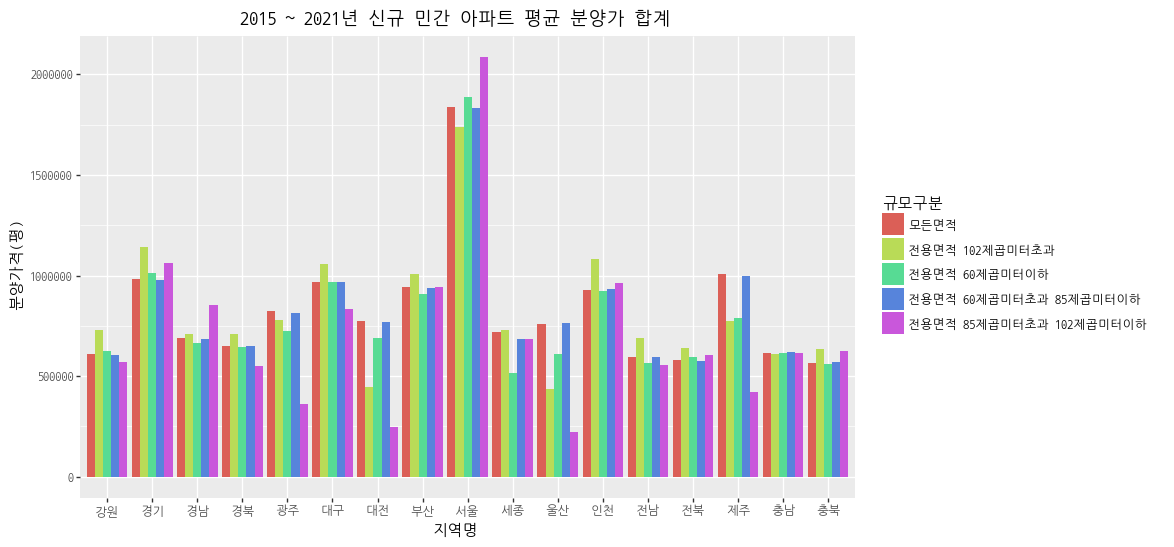

<ggplot: (369239571)>

In [41]:
# 규모별/지역별 평당 분양가 합계 시각화
(ggplot(pre_sale_melt, aes(x='지역명', y='분양가격(평)', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양가 합계')
 )

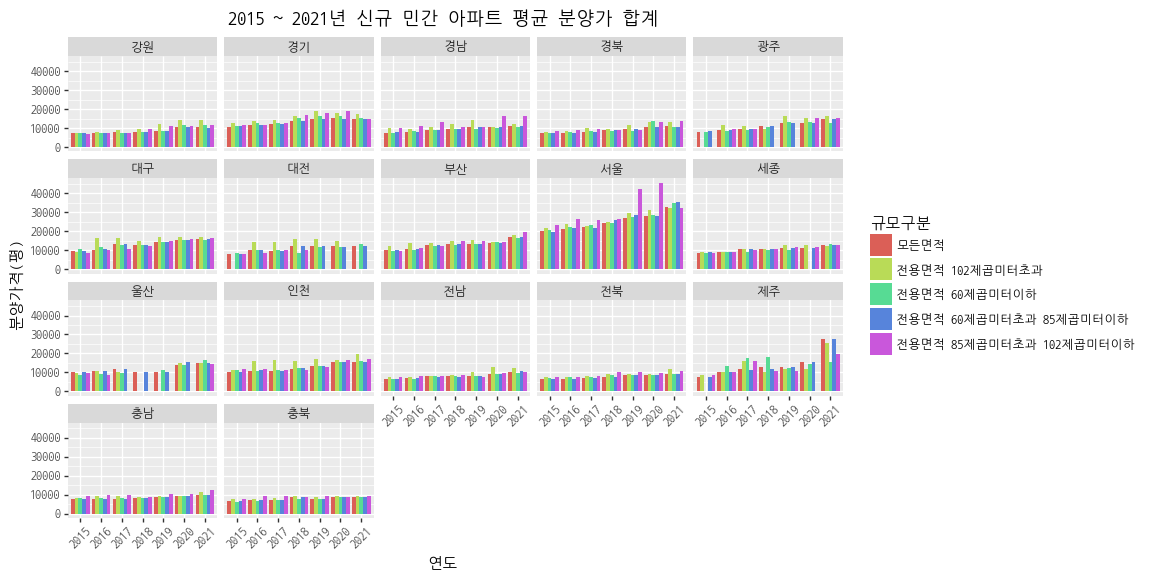

<ggplot: (369390077)>

In [42]:
(ggplot(pre_sale, aes(x='연도', y='분양가격(평)', fill='규모구분'))
 + geom_bar(stat='identity', position='dodge')
 + facet_wrap('지역명')
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6), axis_text_x=element_text(rotation=45))
 + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양가 합계')
 )

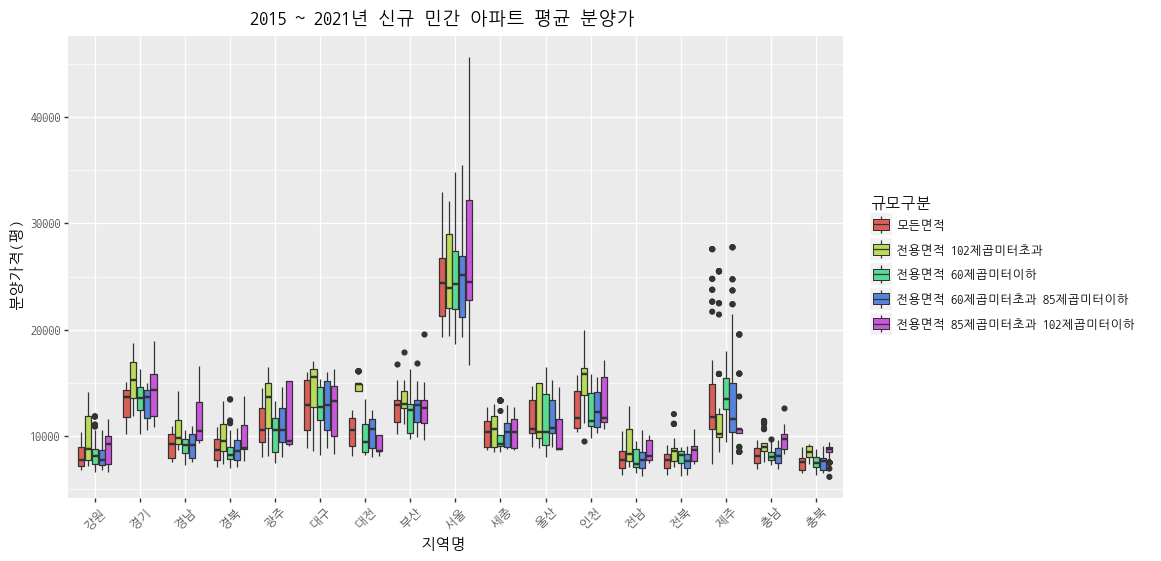

<ggplot: (370166236)>

In [43]:
# boxplot 그리기
(ggplot(pre_sale, aes(x='지역명', y='분양가격(평)', fill='규모구분'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6), axis_text_x=element_text(rotation=45))
 + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양가')
 )

In [44]:
# 사업 규모가 가장 컸던 서울
pre_sale_seoul = pre_sale[pre_sale['지역명'] == '서울']
pre_sale_seoul

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(평)
0,서울,모든면적,2015,10,"5,841.0","19,275.3"
1,서울,전용면적 60제곱미터이하,2015,10,"5,652.0","18,651.6"
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"5,882.0","19,410.6"
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"5,721.0","18,879.3"
4,서울,전용면적 102제곱미터초과,2015,10,"5,879.0","19,400.7"
...,...,...,...,...,...,...
6290,서울,모든면적,2021,12,"9,983.0","32,943.9"
6291,서울,전용면적 60제곱미터이하,2021,12,"10,553.0","34,824.9"
6292,서울,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"10,746.0","35,461.8"
6293,서울,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"7,274.0","24,004.2"


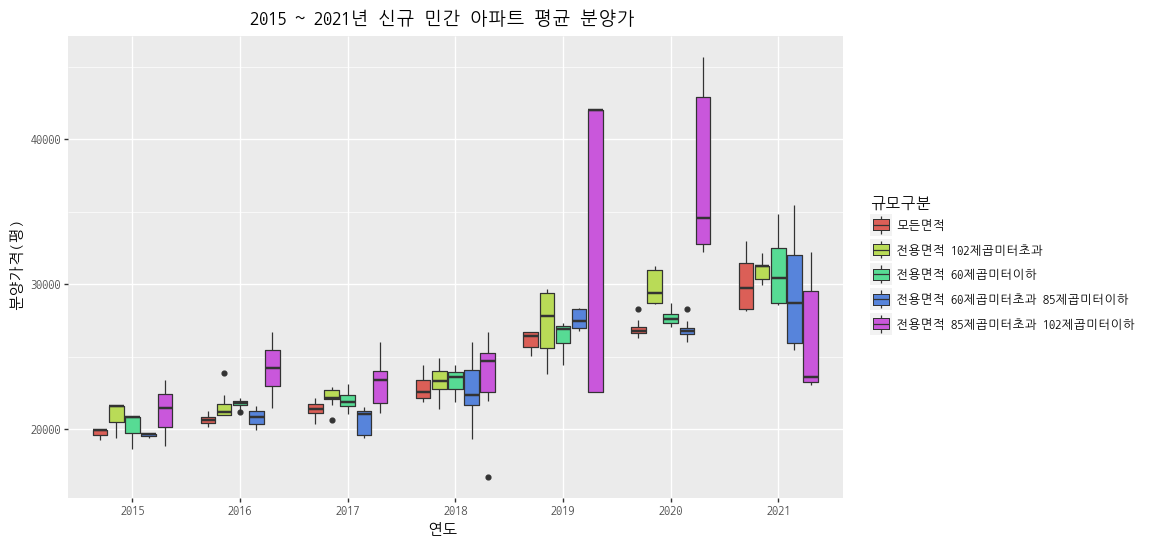

<ggplot: (370209759)>

In [45]:
# boxplot 그리기
(ggplot(pre_sale_seoul, aes(x='연도', y='분양가격(평)', fill='규모구분'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양가')
 )

In [46]:
# 상승액이 가장 큰 지역 제주
pre_sale_jeju = pre_sale[pre_sale['지역명'] == '제주']
pre_sale_jeju

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(평)
80,제주,모든면적,2015,10,"2,232.0","7,365.6"
81,제주,전용면적 60제곱미터이하,2015,10,NaN,NaN
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225.0","7,342.5"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583.0","8,523.9"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574.0","8,494.2"
...,...,...,...,...,...,...
6370,제주,모든면적,2021,12,"6,574.0","21,694.2"
6371,제주,전용면적 60제곱미터이하,2021,12,"2,862.0","9,444.6"
6372,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"6,516.0","21,502.8"
6373,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"5,924.0","19,549.2"


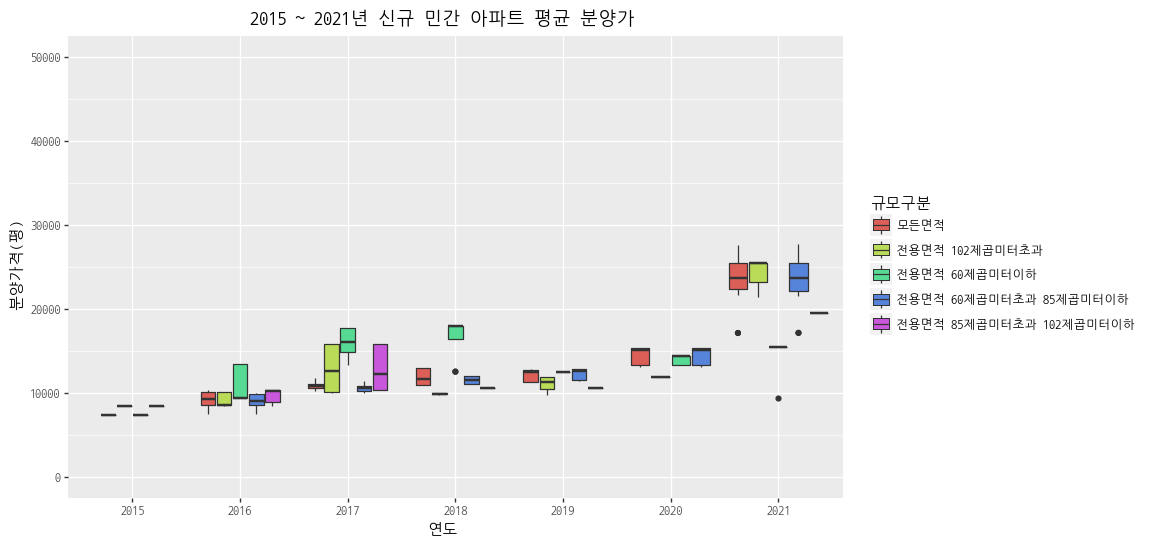

<ggplot: (371402987)>

In [57]:
(ggplot(pre_sale_jeju, aes(x='연도', y='분양가격(평)', fill='규모구분'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양가')
 + scale_y_continuous(limits=(0, 50000))
 )

In [50]:
# 상승액이 가장 큰 지역 충북
pre_sale_chungbuk = pre_sale[pre_sale['지역명'] == '충북']
pre_sale_chungbuk

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격(평)
50,충북,모든면적,2015,10,"2,032.0","6,705.6"
51,충북,전용면적 60제곱미터이하,2015,10,"1,919.0","6,332.7"
52,충북,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,033.0","6,708.9"
53,충북,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,102.0","6,936.6"
54,충북,전용면적 102제곱미터초과,2015,10,"2,369.0","7,817.7"
...,...,...,...,...,...,...
6340,충북,모든면적,2021,12,"2,729.0","9,005.7"
6341,충북,전용면적 60제곱미터이하,2021,12,"2,657.0","8,768.1"
6342,충북,전용면적 60제곱미터초과 85제곱미터이하,2021,12,"2,735.0","9,025.5"
6343,충북,전용면적 85제곱미터초과 102제곱미터이하,2021,12,"2,752.0","9,081.6"


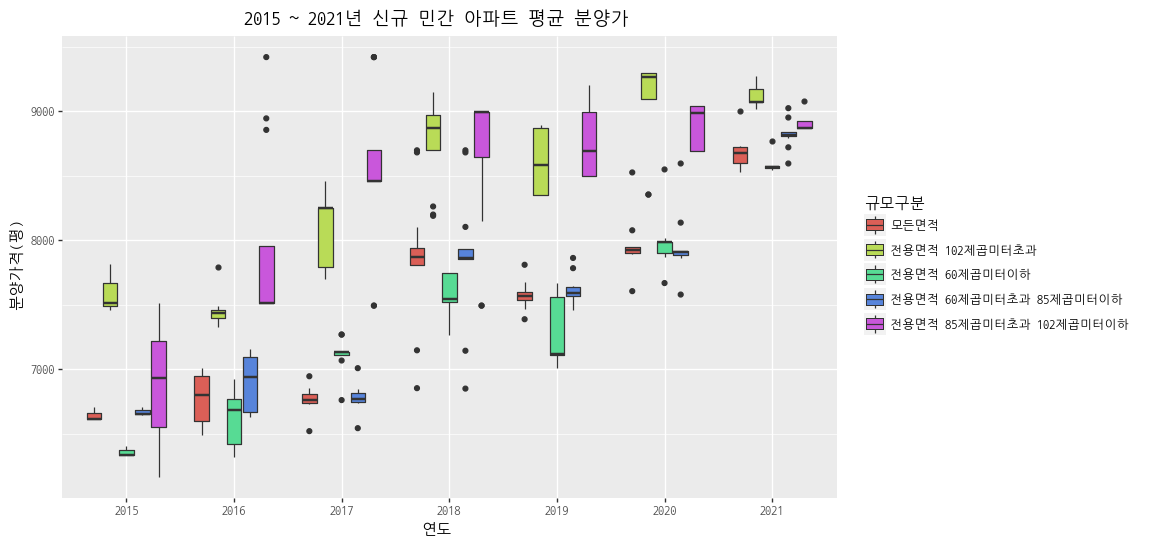

<ggplot: (368989877)>

In [51]:
(ggplot(pre_sale_chungbuk, aes(x='연도', y='분양가격(평)', fill='규모구분'))
 + geom_boxplot()
 + theme(text=element_text(family='NanumGothicCoding'), figure_size=(10, 6))
 + ggtitle('2015 ~ 2021년 신규 민간 아파트 평균 분양가')
 )